In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from EvEye.utils.visualization.visualization import *
from EvEye.utils.tonic.functional.ToFrameStack import to_frame_stack_numpy
from EvEye.utils.cache.MemmapCacheStructedEvents import *

In [3]:
index = 83
# index = 11572
sensor_size = (346, 260, 2)
time_window = 10000
events_interpolation = "causal_linear"

In [4]:
events_path = Path(
    "/mnt/data2T/junyuan/Datasets/FixedCount5000Dataset/train/cached_data"
)
ellipses_path = Path(
    "/mnt/data2T/junyuan/Datasets/FixedCount5000Dataset/train/cached_ellipse"
)
output_path = "/mnt/data2T/junyuan/eye-tracking/images"
os.makedirs(output_path, exist_ok=True)
ellipse = convert_to_ellipse(load_ellipse(index, ellipses_path))
event_segment = load_event_segment(index, events_path, 5000)

In [38]:
event_frame_raw = to_frame_stack_numpy(
    event_segment,
    sensor_size,
    1,
    events_interpolation,
    event_segment['t'][0],
    event_segment['t'][-1],
)

event_frame_raw_vis = visualize(event_frame_raw)
# ellipse = convert_to_ellipse(ellipses[index])
draw_ellipse(event_frame_raw_vis, ellipse, thickness=1)
# cv2.ellipse(event_frame_raw_vis, ellipse, (0, 255, 0), 2)
event_frame_raw_vis[np.all(event_frame_raw_vis == [0, 0, 0], axis=-1)] = [230, 230, 255]
canvas = np.zeros((event_frame_raw_vis.shape[0], event_frame_raw_vis.shape[1], 3), dtype=np.uint8)
canvas[np.all(canvas == [0, 0, 0], axis=-1)] = [150, 0, 0]
# draw_ellipse(canvas, ellipse, thickness=3)
canvas = cv2.resize(canvas, (256,256))

cv2.cvtColor(event_frame_raw_vis, cv2.COLOR_RGB2BGR)
True

True

True

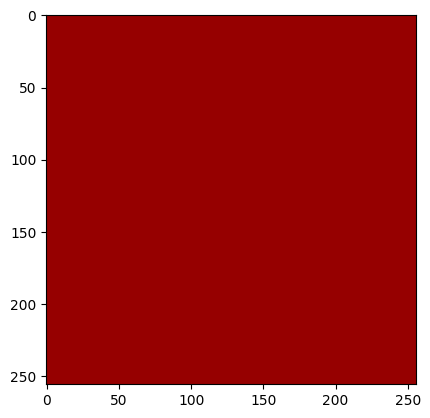

In [39]:
plt.imshow(canvas)
save_image(canvas, f"{output_path}/canvas.png")

True

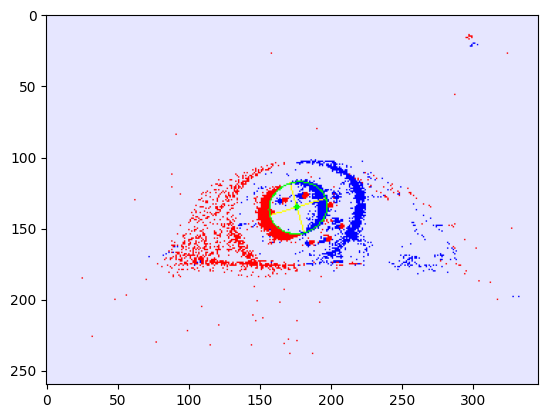

In [27]:
plt.imshow(event_frame_raw_vis)
save_image(event_frame_raw_vis, f"{output_path}/event.png")

True

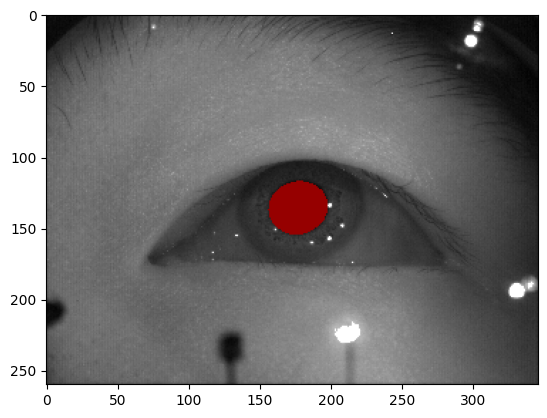

In [8]:
image_path = f"/mnt/data2T/junyuan/Datasets/RGBUNetDataset/train/data/{index:05}.png"
image = cv2.imread(image_path)
cv2.ellipse(image, ellipse, (150, 0, 0), -1)
plt.imshow(image)
save_image(image, f"{output_path}/image.png")

In [9]:
def draw_multiline_text_on_image(
    image,
    text,
    position=(10, 30),
    font=cv2.FONT_HERSHEY_SIMPLEX,
    font_scale=0.5,
    color=(255, 255, 255),
    thickness=1,
    line_spacing=15,
):
    """
    在图像上指定位置绘制多行文本
    """
    lines = text.split('\n')
    x, y = position
    for line in lines:
        cv2.putText(
            image,
            line,
            (x, y),
            font,
            font_scale,
            color,
            thickness,
            lineType=cv2.LINE_AA,
        )
        y += line_spacing